In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv('weather-2021-preprocessed.csv')
df.head()

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Description,UV Index,Condition
0,2021-01-01 00:00:00,75,75.0,75.0,61.0,61.0,6.0,8,29.85,Low,0,Cloudy
1,2021-01-01 00:30:00,75,75.0,75.0,61.0,61.0,6.0,7,29.85,Low,0,Cloudy
2,2021-01-01 01:00:00,75,75.0,75.0,61.0,61.0,6.0,7,29.82,Low,0,Cloudy
3,2021-01-01 01:30:00,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Cloudy
4,2021-01-01 02:00:00,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Cloudy


## Câu hỏi 1:

### Nội dung câu hỏi
Mối tương quan giữa nhiệt độ và chỉ số UV là gì?

### Lợi ích khi trả lời câu hỏi
Giúp ta biết được mối tương quan chung giữa nhiệt độ và chỉ số UV; đồng thời, dựa trên mối tương quan đó theo từng mức độ UV, ta có thể hiểu ý nghĩa của từng mức độ này là như thế nào.

### Nguồn cảm hứng của câu hỏi
Nhóm tự suy nghĩ từ trong quá trình khám phá dữ liệu.

### Phân tích dữ liệu để trả lời cho câu hỏi
- Trực quan hóa dữ liệu bằng jointplot (seaborn), trong đó:
    - Trục hoành: Nhiệt độ
    - Trục tung: Chỉ số UV
- Trực quan hóa dữ liệu bằng facetgrid và scatterplot (seaborn), trong đó:
    - Mỗi ô trong lưới sẽ là mỗi mức độ UV
    - Trục hoành: Nhiệt độ
    - Trục tung: Chỉ số UV

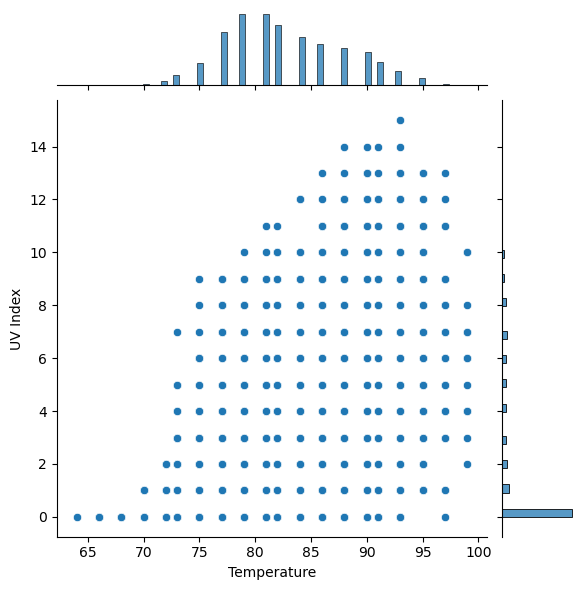

In [5]:
sns.jointplot(data=df, x='Temperature', y='UV Index')

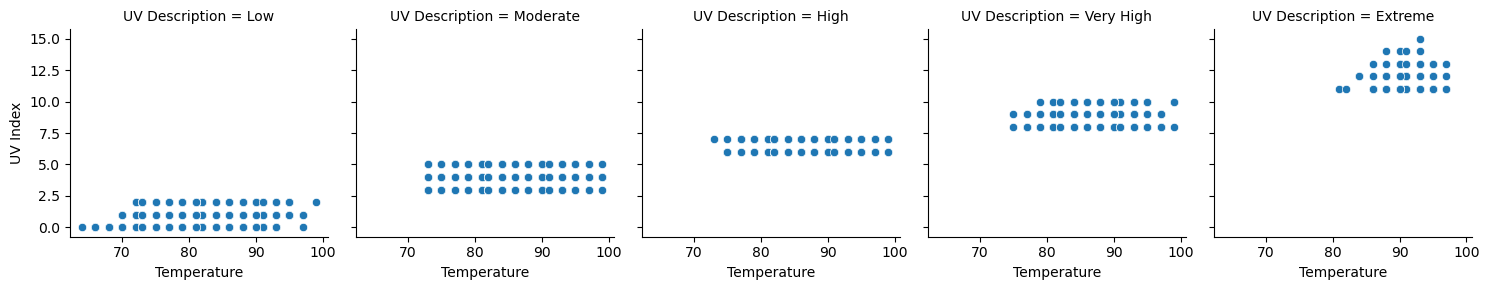

In [6]:
graph = sns.FacetGrid(data=df, col='UV Description')
graph.map(sns.scatterplot, 'Temperature', 'UV Index')

### Nhận xét:


## Câu hỏi 2:

### Nội dung câu hỏi
Nhiệt độ trung bình trong ngày theo từng tháng như thế nào?

### Lợi ích khi trả lời câu hỏi


### Nguồn cảm hứng của câu hỏi
Từ Lab 3 môn Nhập môn Khoa học dữ liệu.

### Phân tích dữ liệu để trả lời cho câu hỏi
Bước 1:
Bước 2:

Code bước 1:

In [19]:
df['Time'] = pd.to_datetime(df['Time'])

mean_temp_per_h_each_m = df[['Temperature', 'Time']].groupby([df['Time'].dt.hour, df['Time'].dt.month]).mean()

t = []
for i in range(1, 13):
    t.append(mean_temp_per_h_each_m[mean_temp_per_h_each_m.index.get_level_values(1) == i].values.flatten())

mean_temp_per_h_each_m = pd.DataFrame(np.flip(np.asarray(t).transpose(), 0))
mean_temp_per_h_each_m

,0,1,2,3,4,5,6,7,8,9,10,11
0,77.145161,77.178571,81.209677,82.333333,82.677419,81.250000,80.590164,79.612903,78.866667,79.096774,79.716667,77.866667
1,78.193548,77.928571,81.725806,82.627119,83.016129,81.694915,80.983607,79.822581,78.916667,79.209677,80.450000,78.716667
2,78.741935,78.490909,82.241935,83.116667,83.540984,82.233333,81.241935,80.225806,79.433333,79.193548,81.000000,79.500000
3,79.564516,79.428571,82.967742,83.516667,84.065574,82.800000,81.688525,80.435484,80.083333,79.354839,81.576271,80.066667
4,80.459016,80.000000,84.145161,84.133333,84.700000,83.186441,82.000000,81.193548,80.366667,80.016129,82.355932,80.700000
5,81.548387,80.839286,85.596774,85.800000,85.786885,84.700000,83.096774,82.645161,80.950000,80.919355,82.966667,81.850000
6,83.612903,83.553571,88.209677,87.716667,86.606557,86.300000,84.387097,84.612903,82.450000,82.262295,84.216667,84.118644
7,86.161290,86.321429,90.774194,89.500000,87.854839,87.200000,86.048387,86.483871,84.216667,84.209677,85.933333,86.457627
8,88.048387,87.964286,92.951613,90.533333,89.245902,89.150000,87.564516,88.129032,85.666667,85.933333,86.983333,87.949153
9,88.145161,88.892857,93.716667,91.066667,89.790323,90.400000,87.967742,88.741935,86.250000,86.934426,87.933333,88.483333


Code bước 2:

<AxesSubplot:>

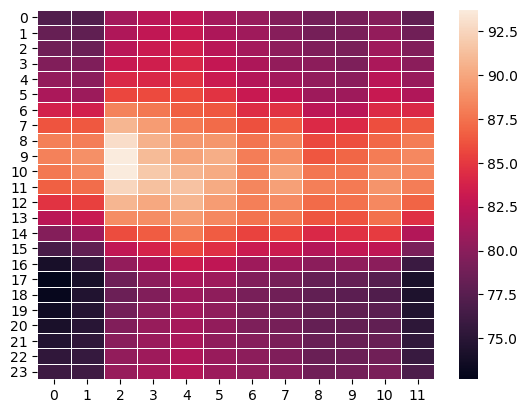

In [20]:
sns.heatmap(mean_temp_per_h_each_m, linewidth = 0.5)

### Nhận xét:
